In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv("Avm_Musterileri.csv")

df.head(5)

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


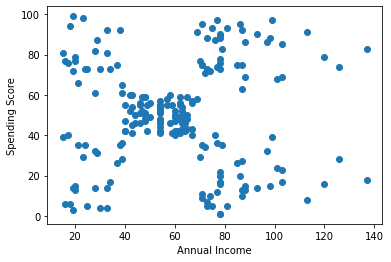

In [2]:
## veri setine bir goz atalım.
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


In [3]:
## sutunların ismini degistirelim
df.rename(columns = {"Annual Income (k$)" : "income"}, inplace = True)
## false deseydik yeni bir dataframe olusturur ve onun sutunlarını degistirirdi.

df.rename(columns = {"Spending Score (1-100)" : "score"}, inplace = True)

In [4]:
df.head(5)

,CustomerID,income,score
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [5]:
## degerleri olceklemek için MinMaxScaler() fonksiyonunu kullanıcaz.
scaler = MinMaxScaler()

scaler.fit(df[["income"]])
df["income"] = scaler.transform(df[["income"]])

scaler.fit(df[["score"]])
df["score"] = scaler.transform(df[["score"]])


df.head(5)

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [6]:
## K degeerini belirleyelim (Elbow yontemi kullanarak)
k_range = range(1, 11)

list_dist = []

for k in k_range:
    kmeans_model = KMeans(n_clusters = k)
    kmeans_model.fit(df[["income", "score"]])
    list_dist.append(kmeans_model.inertia_)

C:\Users\90531\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


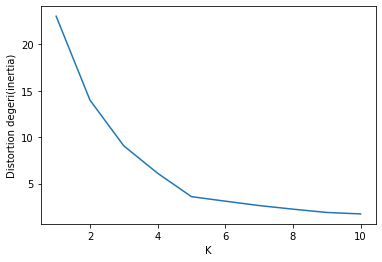

In [7]:
plt.xlabel("K")
plt.ylabel("Distortion degeri(inertia)")
plt.plot(k_range, list_dist)
plt.show()

In [12]:
## gtrafiğe gore en iyi k degeri 5
## k = 5 için KMeans modeli olusturalım.
kmeans_model = KMeans(n_clusters = 5)
y_predict = kmeans_model.fit_predict(df[["income","score"]])
y_predict

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [13]:
df["cluster"] = y_predict
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,3
1,2,0.000000,0.816327,0
2,3,0.008197,0.051020,3
3,4,0.008197,0.775510,0
4,5,0.016393,0.397959,3


In [14]:
## centroidleri gorelim
kmeans_model.cluster_centers_

array([[0.08792846, 0.79962894],
       [0.58638083, 0.82783883],
       [0.6       , 0.16443149],
       [0.09265859, 0.20319432],
       [0.33029751, 0.49508692]])

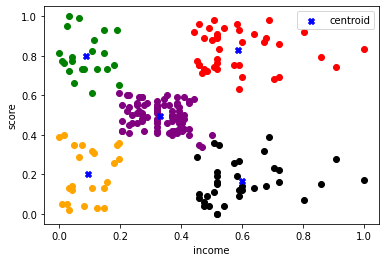

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]


plt.xlabel('income')
plt.ylabel('score')
plt.scatter(df1['income'],df1['score'],color='green')
plt.scatter(df2['income'],df2['score'],color='red')
plt.scatter(df3['income'],df3['score'],color='black')
plt.scatter(df4['income'],df4['score'],color='orange')
plt.scatter(df5['income'],df5['score'],color='purple')



# kmeans_modelim.cluster_centers_ numpy 2 boyutlu array olduğu için x ve y sütunlarını kmeans_modelim.cluster_centers_[:,0] 
# ve kmeans_modelim.cluster_centers_[:,1] şeklinde scatter plot için alıyoruz:
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend()
plt.show()
